<font size=6><b>Lec08.옵션 실습

In [144]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

import datetime
import warnings
warnings.filterwarnings('ignore')

# CME 거래소
* 범 세계적인 파생 상품거래소를 운영

* CME 선물옵션 상품 (거래일 04 Oct 2022 | FINAL)
* ref : https://www.cmegroup.com/ko/trading/options.html
<div class="cmeTableWrapper cmeContentTableWrapper"><table cellspacing="0" border="0" cellpadding="2" class="cmeTable cmeFloatingHead"><thead class="cmeFloatingHeader is-alone">
	<thead>
		<tr>
			<th scope="col">청산</th>
			<th scope="col">CME Globex</th>
			<th scope="col">플로어</th>
			<th scope="col">CME ClearPort</th>
			<th id="productName" scope="col">상품명</th>
			<th scope="col">소그룹</th>
			<th scope="col">거래소</th>
			<th scope="col">거래량</th>
			<th scope="col">미결제약정</th>
		</tr>
	</thead>
	<tbody>
		<tr class="">
			<td>HX</td>
			<td>HXE</td>
			<td>-</td>
			<td>HX</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/metals/base/copper_contractSpecs_options.html?optionProductId=797">Copper Option</a></th>
			<td>Base</td>
			<td>COMEX</td>
			<td class="cmeTableRight">6,025</td>
			<td class="cmeTableRight">73,258</td>
		</tr>
		<tr class="">
			<td>C</td>
			<td>OZC</td>
			<td>-</td>
			<td>C</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/agricultural/grain-and-oilseed/corn_contractSpecs_options.html?optionProductId=301">Corn Options</a></th>
			<td>Grains</td>
			<td>CBOT</td>
			<td class="cmeTableRight">71,148</td>
			<td class="cmeTableRight">1,641,494</td>
		</tr>
		<tr class="">
			<td>LO</td>
			<td>LO</td>
			<td>-</td>
			<td>LO</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/energy/crude-oil/light-sweet-crude_contractSpecs_options.html?optionProductId=190">Crude Oil Option</a></th>
			<td>Crude Oil</td>
			<td>NYMEX</td>
			<td class="cmeTableRight">94,182</td>
			<td class="cmeTableRight">2,419,037</td>
		</tr>
		<tr class="">
			<td>NQ</td>
			<td>NQ</td>
			<td>-</td>
			<td>NQ</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/equity-index/us-index/e-mini-nasdaq-100_contractSpecs_options.html?optionProductId=148">E-mini Nasdaq-100 Options</a></th>
			<td>Nasdaq</td>
			<td>CME</td>
			<td class="cmeTableRight">5,667</td>
			<td class="cmeTableRight">69,206</td>
		</tr>
		<tr class="">
			<td>OG</td>
			<td>OG</td>
			<td>-</td>
			<td>OG</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/metals/precious/gold_contractSpecs_options.html?optionProductId=192">Gold Option</a></th>
			<td>Precious</td>
			<td>COMEX</td>
			<td class="cmeTableRight">85,614</td>
			<td class="cmeTableRight">825,822</td>
		</tr>
		<tr class="">
			<td>ON</td>
			<td>ON</td>
			<td>-</td>
			<td>ON</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/energy/natural-gas/natural-gas_contractSpecs_options.html?optionProductId=191">Natural Gas Option (American)</a></th>
			<td>Natural Gas</td>
			<td>NYMEX</td>
			<td class="cmeTableRight">2,282</td>
			<td class="cmeTableRight">31,613</td>
		</tr>
		<tr class="">
			<td>YM</td>
			<td>OYM</td>
			<td>-</td>
			<td>YM</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/equity-index/us-index/e-mini-dow_contractSpecs_options.html?optionProductId=319">Options on E-mini Dow Jones Industrial Average Index Futures</a></th>
			<td>Dow Jones</td>
			<td>CBOT</td>
			<td class="cmeTableRight">148</td>
			<td class="cmeTableRight">511</td>
		</tr>
		<tr class="">
			<td>SO</td>
			<td>SO</td>
			<td>-</td>
			<td>SO</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/metals/precious/silver_contractSpecs_options.html?optionProductId=193">Silver Option</a></th>
			<td>Precious</td>
			<td>COMEX</td>
			<td class="cmeTableRight">12,536</td>
			<td class="cmeTableRight">122,483</td>
		</tr>
		<tr class="">
			<td>S</td>
			<td>OZS</td>
			<td>-</td>
			<td>S</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/ko/trading/agricultural/grain-and-oilseed/soybean_contractSpecs_options.html?optionProductId=321">Soybean Options</a></th>
			<td>Oilseeds</td>
			<td>CBOT</td>
			<td class="cmeTableRight">39,595</td>
			<td class="cmeTableRight">555,326</td>
		</tr>
	</tbody>
</table></div>


</div>

</div>

* CME 주요 주가지수 선물옵션 상품 (거래일 04 Oct 2022 | FINAL)
* ref : https://www.cmegroup.com/ko/trading/equity-index/options-on-futures.html
* S&P mini : https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.contractSpecs.options.html#optionProductId=10032
    <table cellspacing="0" border="0" cellpadding="2" class="cmeTable cmeFloatingHead">
	<thead>
		<tr>
			<th scope="col">청산</th>
			<th scope="col">CME Globex</th>
			<th scope="col">플로어</th>
			<th scope="col">CME ClearPort</th>
			<th id="productName" scope="col">상품명</th>
			<th scope="col">소그룹</th>
			<th scope="col">거래소</th>
			<th scope="col">거래량</th>
			<th scope="col">미결제약정</th>
		</tr>
	</thead>
	<tbody>
		<tr class="">
			<td>EW1</td>
			<td>EW1</td>
			<td>-</td>
			<td>EW1</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500_contractSpecs_options.html?optionProductId=2915">E-mini S&amp;P 500 Weekly Options - Week 1</a></th>
			<td>S&amp;P</td>
			<td>CME</td>
			<td class="cmeTableRight">186,675</td>
			<td class="cmeTableRight">376,425</td>
		</tr>
		<tr class="">
			<td>ES</td>
			<td>ES</td>
			<td>-</td>
			<td>ES</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500_contractSpecs_options.html?optionProductId=138">E-mini S&amp;P 500 Options</a></th>
			<td>S&amp;P</td>
			<td>CME</td>
			<td class="cmeTableRight">125,814</td>
			<td class="cmeTableRight">1,537,207</td>
		</tr>
		<tr class="">
			<td>EW2</td>
			<td>EW2</td>
			<td>-</td>
			<td>EW2</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500_contractSpecs_options.html?optionProductId=2916">E-mini S&amp;P 500 Weekly Options - Week 2</a></th>
			<td>S&amp;P</td>
			<td>CME</td>
			<td class="cmeTableRight">75,333</td>
			<td class="cmeTableRight">188,319</td>
		</tr>
		<tr class="">
			<td>EW</td>
			<td>EW</td>
			<td>-</td>
			<td>EW</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500_contractSpecs_options.html?optionProductId=136">E-mini S&amp;P 500 EOM Options</a></th>
			<td>S&amp;P</td>
			<td>CME</td>
			<td class="cmeTableRight">67,987</td>
			<td class="cmeTableRight">485,159</td>
		</tr>
		<tr class="">
			<td>EW4</td>
			<td>EW4</td>
			<td>-</td>
			<td>EW4</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500_contractSpecs_options.html?optionProductId=5222">E-mini S&amp;P 500 Weekly Options - Week 4</a></th>
			<td>S&amp;P</td>
			<td>CME</td>
			<td class="cmeTableRight">16,657</td>
			<td class="cmeTableRight">65,420</td>
		</tr>
		<tr class="">
			<td>NQ</td>
			<td>NQ</td>
			<td>-</td>
			<td>NQ</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-nasdaq-100_contractSpecs_options.html?optionProductId=148">E-mini Nasdaq-100 Options</a></th>
			<td>Nasdaq</td>
			<td>CME</td>
			<td class="cmeTableRight">5,667</td>
			<td class="cmeTableRight">69,206</td>
		</tr>
		<tr class="">
			<td>YM</td>
			<td>OYM</td>
			<td>-</td>
			<td>YM</td>
			<th scope="row" class="cmeTableLeft"><a href="https://www.cmegroup.com/trading/equity-index/us-index/e-mini-dow_contractSpecs_options.html?optionProductId=319">Options on E-mini Dow Jones Industrial Average Index Futures</a></th>
			<td>Dow Jones</td>
			<td>CBOT</td>
			<td class="cmeTableRight">148</td>
			<td class="cmeTableRight">511</td>
		</tr>
	</tbody>
</table>


## 옵션 캘린더
* https://www.cmegroup.com/tools-information/quikstrike/options-calendar.html

# Data Load
* https://finance.yahoo.com/options/highest-open-interest
* https://www.cmegroup.com/ko/trading/options.html

* (좌) <b>Bid</b> : 구매자들이 구입하려고 부르는 <b>매수 가격</b> --> 판매자입장에선 <font color=red><b>bis 최대 가격에 매도(SELL) : short</b></font>
* (우) <b>Ask</b> : 판매자들이 판매하려고 부르는 <b>매도 가격</b> --> 구매자입장에선 <font color=red><b>ask 최소 가격에 매수(BUY) : long</b></font>
* Ask(매도가) >  Bid(매수가)
* Price : 실제 매매된 가격 : last sell order == bid price
* Spred : 가장 높은 bid price - 가장 낮은 ask price사이 가격차
* Open Interest : 미결제약정
    * 미결제약정 증가 : 거래활발, 현재의 가격 추세를 지속시킬것으로 예측
    * 미결제약정 감소 : 거래감소, 현재의 가격 추세를 약화시킬것으로 예측<br><br>
<img src="https://www.fpmarkets.com/wp-content/themes/fptheme/int/image-2020/Trading-cfds/Group-344-299x220.png">


In [137]:
# ! pip install --upgrade pandas
# ! pip install --upgrade pandas-datareader
# ! pip install yfinance --upgrade --no-cache-dir

## pandas_datareader, yfinance 패키지

In [110]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

# yf.pdr_override()

start = datetime.strptime('2020-01-01', '%Y-%m-%d')
end   = datetime.strptime('2020-12-31', '%Y-%m-%d')

# sp500 = pdr.get_data_yahoo("^GSPC", start, end) #['Adj Close']
sp500 = pdr.get_data_yahoo("TSLA", start, end) #['Adj Close']
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


## Qunat Price app
* ref : https://quantprice.herokuapp.com/api/v1.1/scoop/period?tickers=IBM,MSFT&begin=2012-02-19

## yahoo_fin 패키지
* ref : https://finance.yahoo.com/quote/MSFT/history?p=MSFT
* ref : https://finance.yahoo.com/quote/MSFT/history?period1=1633392000&period2=1664928000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
* ref : http://theautomatic.net/2019/04/17/how-to-get-options-data-with-python/

In [191]:
# ! pip install yahoo_fin
# ! pip install html5lib

### 종목선정

In [291]:
from yahoo_fin import options

# https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.contractSpecs.options.html
# PRODUCT CODE : CME Globex: ES, EYC, TESLA
MY_PROD_CODE__ = 'TSLA' #'ES'

exp_date = options.get_expiration_dates(MY_PROD_CODE__)
print(exp_date)

# 옵션 만료일자 
MY_EXP_DATE__ = 'October 7, 2022' #'November 18, 2022'

['October 7, 2022', 'October 14, 2022', 'October 21, 2022', 'October 28, 2022', 'November 4, 2022', 'November 11, 2022', 'November 18, 2022', 'December 16, 2022', 'January 20, 2023', 'February 17, 2023', 'March 17, 2023', 'April 21, 2023', 'June 16, 2023', 'September 15, 2023', 'January 19, 2024', 'March 15, 2024', 'June 21, 2024', 'January 17, 2025']


### call put 모두 가져오기

In [292]:
df = options.get_options_chain(MY_PROD_CODE__, MY_EXP_DATE__)
df["calls"].head(2)
# print(chain["puts"])

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA221007C00100000,2022-10-04 3:54PM EDT,100.0,149.20,140.3,141.10,0.0,-,18,439,439.06%
1,TSLA221007C00110000,2022-10-03 3:41PM EDT,110.0,134.08,130.2,131.35,0.0,-,7,50,433.01%


In [293]:
df["puts"].head(2)

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA221007P00100000,2022-10-05 3:47PM EDT,100.0,0.01,0.0,0.01,0.0,-,26,10172,293.75%
1,TSLA221007P00110000,2022-10-03 1:44PM EDT,110.0,0.01,0.0,0.01,0.0,-,218,1059,262.50%


### call put 각각 가져오기

In [294]:
cdf = options.get_calls(MY_PROD_CODE__, MY_EXP_DATE__)
cdf.head(2)

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA221007C00100000,2022-10-04 3:54PM EDT,100.0,149.20,140.3,141.10,0.0,-,18,439,439.06%
1,TSLA221007C00110000,2022-10-03 3:41PM EDT,110.0,134.08,130.2,131.35,0.0,-,7,50,433.01%


In [295]:
pdf = options.get_puts(MY_PROD_CODE__, MY_EXP_DATE__) # "04/11/22")
pdf.head(2)

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA221007P00100000,2022-10-05 3:47PM EDT,100.0,0.01,0.0,0.01,0.0,-,26,10172,293.75%
1,TSLA221007P00110000,2022-10-03 1:44PM EDT,110.0,0.01,0.0,0.01,0.0,-,218,1059,262.50%


### YahooOptions() 현재 에러
* RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/options/TSLA
   Response Text: b'Forbidden'

* interval  : [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
* period1=1510340760  #start date e.g. 
* period2=1510663712  #start date e.g. 

In [178]:
# import pandas_datareader.data as web
# https://query1.finance.yahoo.com/v7/finance/options/TSLA

# startDate = datetime.datetime(2016, 8, 15)
# endDate = datetime.datetime(2016, 8, 17)

# TSLA = web.YahooOptions('TSLA')  
# option_df = TSLA.get_all_data()
# option_df.reset_index(inplace=True)

# exp1 = option_df[option_df.Expiry == TSLA.expiry_dates[1]]
# calls = exp1[exp1.Type=='call']
# calls['C'] = (calls.Bid+calls.Ask)/2
# puts = exp1[exp1.Type=='put']
# puts['P'] = (puts.Bid+puts.Ask)/2

# df = pd.merge(calls, puts, how='inner', on ='Strike')
# df

* 임시 해결책 : url 직접 호출 json()으로 받아서 사용

In [296]:
url="https://query2.finance.yahoo.com/v7/finance/options/TSLA"
res = requests.get(url, headers={'User-agent': 'Mozilla/5.0'})
df = pd.DataFrame(res.json()['optionChain']['result'])
df

,underlyingSymbol,expirationDates,strikes,hasMiniOptions,quote,options
0,TSLA,"[1665100800, 1665705600, 1666310400, 166691520...","[100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160...",False,"{'language': 'en-US', 'region': 'US', 'quoteTy...","[{'expirationDate': 1665100800, 'hasMiniOption..."


### 만료일별 옵션 데이터

In [297]:
nflx_dates= options.get_expiration_dates(MY_PROD_CODE__)
 
info = {}
for date in nflx_dates:
    info[date] = options.get_options_chain(MY_PROD_CODE__)

In [298]:
cdf = info[MY_EXP_DATE__]['calls'].sort_values('Contract Name')
cdf

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA221007C00100000,2022-10-04 3:54PM EDT,100.0,149.20,140.30,141.10,0.00,-,18,439,439.06%
1,TSLA221007C00110000,2022-10-03 3:41PM EDT,110.0,134.08,130.20,131.35,0.00,-,7,50,433.01%
2,TSLA221007C00120000,2022-10-05 12:21PM EDT,120.0,116.48,120.15,121.25,-13.67,-10.50%,1,15,376.95%
3,TSLA221007C00130000,2022-10-05 1:34PM EDT,130.0,108.75,110.20,111.25,-16.85,-13.42%,10,13,337.70%
4,TSLA221007C00140000,2022-10-05 3:18PM EDT,140.0,102.10,100.30,101.00,-6.10,-5.64%,148,246,266.41%
...,...,...,...,...,...,...,...,...,...,...,...
78,TSLA221007C00570000,2022-09-20 9:30AM EDT,570.0,0.02,0.00,0.01,0.00,-,-,5,268.75%
79,TSLA221007C00580000,2022-09-23 9:35AM EDT,580.0,0.01,0.00,0.01,0.00,-,1,43,275.00%
80,TSLA221007C00590000,2022-09-15 12:45PM EDT,590.0,0.02,0.00,0.01,0.00,-,-,2,281.25%
81,TSLA221007C00600000,2022-10-03 9:41AM EDT,600.0,0.01,0.00,0.01,0.00,-,20,60,287.50%


In [299]:
pdf = info[MY_EXP_DATE__]['puts'].sort_values('Contract Name')
pdf

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,TSLA221007P00100000,2022-10-05 3:47PM EDT,100.0,0.01,0.00,0.01,0.0,-,26,10172,293.75%
1,TSLA221007P00110000,2022-10-03 1:44PM EDT,110.0,0.01,0.00,0.01,0.0,-,218,1059,262.50%
2,TSLA221007P00120000,2022-10-05 11:52AM EDT,120.0,0.01,0.00,0.01,0.0,-,1,2537,237.50%
3,TSLA221007P00130000,2022-10-05 10:55AM EDT,130.0,0.01,0.00,0.01,0.0,-,7,1573,206.25%
4,TSLA221007P00140000,2022-10-05 12:29PM EDT,140.0,0.01,0.01,0.01,0.0,-,75,5209,196.88%
...,...,...,...,...,...,...,...,...,...,...,...
67,TSLA221007P00490000,2022-09-08 1:33PM EDT,490.0,203.82,248.55,249.95,0.0,-,1,0,277.34%
68,TSLA221007P00500000,2022-09-29 9:51AM EDT,500.0,223.50,258.55,259.95,0.0,-,2,0,284.38%
69,TSLA221007P00510000,2022-09-20 9:47AM EDT,510.0,202.50,268.55,269.95,0.0,-,-,0,291.41%
70,TSLA221007P00530000,2022-09-29 11:14AM EDT,530.0,257.00,288.55,289.95,0.0,-,15,0,303.91%


# 옵션가
* <가정사항>
    1) 이자율은 알려져 있고 시간이 지나도 일정합니다. 
    2) 주식은 연속 시간에 랜덤 워크를 따르고 주가 경로의 분산은 로그 정규 분포를 따릅니다. 
    3) 변동성은 일정하다 
    4) 주식은 배당금을 지급하지 않습니다(단, 배당금을 포함하도록 수정할 수 있음)
    5) 옵션은 만기시에만 행사할 수 있습니다. 즉, 유럽형 옵션입니다.
    6) 공매도 등의 거래 수수료가 없습니다. 

In [300]:
def europian_option(S, K, T, r, sigma, option_type): 
    N = stat.norm.cdf
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T) 
    if option_type == 'call': 
        V =        S * N(d1)  -         K * np.exp(-r * T) * N(d2) 
    else: 
        V = (-1) * S * N(-d1) -  (-1) * K * np.exp(-r * T) * N(-d2) 
    return V

## 파라미터

In [301]:
S     = 100  #행사가
K     = 100  #초기자산
T     = 1    #잔존만기
r     = 0.1  #이자율
sigma = 0.3  #변동성

In [302]:
option_type="call"
print(f"{option_type} : {np.round(europian_option(S, K, T, r, sigma, option_type),2)}")

call : 16.73


In [303]:
option_type="put"
print(f"{option_type} : {np.round(europian_option(S, K, T, r, sigma, option_type),2)}")

put : 7.22


## 옵션가 변화

### 현재주가(S)를 제외한 모든 변수 고정 시

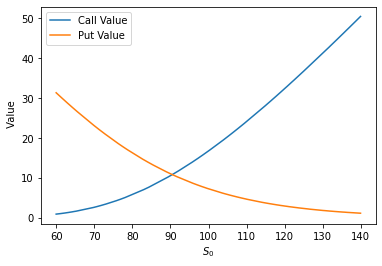

In [304]:
S_random = np.arange(60,140,0.1)

calls = [np.round(europian_option(s, K, T, r, sigma, "call"),2) for s in S_random]
puts  = [np.round(europian_option(s, K, T, r, sigma, "put") ,2) for s in S_random]
plt.plot(S_random, calls, label='Call Value')
plt.plot(S_random, puts , label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

### 변동성(σ)를 제외한 모든 변수 고정 시

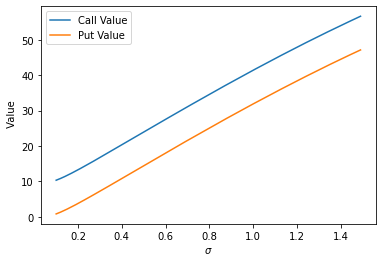

In [305]:
sigma_random = np.arange(0.1, 1.5, 0.01)

calls = [np.round(europian_option(S, K, T, r, sig, "call"),2) for sig in sigma_random]
puts  = [np.round(europian_option(S, K, T, r, sig, "put") ,2) for sig in sigma_random]
plt.plot(sigma_random, calls, label='Call Value')
plt.plot(sigma_random, puts , label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

### 시간(T)를 제외한 모든 변수 고정 시

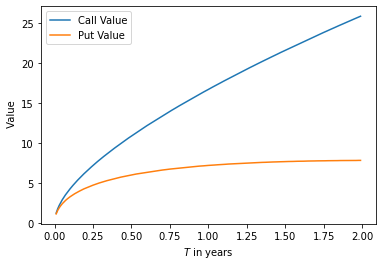

In [306]:
T = np.arange(0, 2, 0.01)

calls = [np.round(europian_option(S, K, t, r, sigma, "call") ,2) for t in T]
puts  = [np.round(europian_option(S, K, t, r, sigma, "put")  ,2) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts , label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()
plt.show()

# 옵션가 계산

## 잔존만기

행사가가 낮으면 낮을수록 콜옵션 가격은 올라간다
 --> 이윤을 남기려고 권리를 행사할 가능성이 커진다

In [343]:
df['Last Trade Date_x'].min(), df['Last Trade Date_x'].max()

('2022-09-15 12:45PM EDT', '2022-10-05 3:59PM EDT')

In [345]:
def 잔존만기(오늘날짜, 만기일자, workday=252):
    오늘날짜 = pd.to_datetime(오늘날짜).date()
    만기일자 = pd.to_datetime(만기일자).date()
    잔존만기일 = np.round((np.busday_count(오늘날짜, 만기일자)+1) / workday ,2)  #begindates, enddates
    print(잔존만기일 * workday)
    return 잔존만기일
잔존만기('2022-09-27', '2022-10-05', workday=252)

7.56


0.03

## 옵션 이론가

In [346]:
from scipy import  stats
def europian_option(S, K, T, r=0.02, sigma=0.4, option_type="call"): 
    N = stat.norm.cdf
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T) 
    if option_type == 'call': 
        V =        S * N(d1)  -         K * np.exp(-r * T) * N(d2) 
    else: 
        V = (-1) * S * N(-d1) -  (-1) * K * np.exp(-r * T) * N(-d2) 
    return np.round(V,4)

In [347]:
from scipy import  stats
def 옵션이론가(기초자산, 행사가, 진존만기일, 이자율=0.02, 변동율=0.4, option_type="call"):
    N = stat.norm.cdf
    d1 = (  np.log(기초자산 / 행사가)  + (이자율 + 변동율**2 * 0.5) * 진존만기일) / (변동율 * np.sqrt(진존만기일))
    d2 = d1 -  (변동율 * np.sqrt(잔존만기일))
    # print(d1, d2)
    if option_type == 'call':
        옵션이론가 =        기초자산 * N(d1, 0.0, 1.0)  -         행사가 * np.exp(-이자율*진존만기일) * N(d2, 0.0, 1.0)
    else: 
        옵션이론가 = (-1) * 기초자산 * N(-d1, 0.0, 1.0) -  (-1) * 행사가 * np.exp(-이자율*진존만기일) * N(-d2, 0.0, 1.0)
    return np.round(옵션이론가,4)

In [348]:
현재일 = '2022-09-27'
만기일 = '2022-10-05'
잔존만기일 = 잔존만기(현재일, 만기일, workday=252)
print(잔존만기일)  

현물가 = 300
행사가 = 330
option_price1 = 옵션이론가(현물가, 행사가, 잔존만기일)
option_price2 = europian_option(현물가, 행사가, 잔존만기일)

print(option_price1, option_price2) 

7.56
0.03
0.8586 0.8586


## 데이터 가공

In [ ]:
# 만기일 MY_EXP_DATE__

In [351]:
cdf['C'] = (cdf.Bid+cdf.Ask)/2
pdf['P'] = (pdf.Bid+pdf.Ask)/2

# calls = cdf[['Strike','C']]
# puts = pdf[['Strike','P']]
df = pd.merge(cdf, pdf, how='inner', on ='Strike')
df.head(2)

,Contract Name_x,Last Trade Date_x,Strike,Last Price_x,Bid_x,Ask_x,Change_x,% Change_x,Volume_x,Open Interest_x,...,Last Trade Date_y,Last Price_y,Bid_y,Ask_y,Change_y,% Change_y,Volume_y,Open Interest_y,Implied Volatility_y,P
0,TSLA221007C00100000,2022-10-04 3:54PM EDT,100.0,149.20,140.3,141.10,0.0,-,18,439,...,2022-10-05 3:47PM EDT,0.01,0.0,0.01,0.0,-,26,10172,293.75%,0.005
1,TSLA221007C00110000,2022-10-03 3:41PM EDT,110.0,134.08,130.2,131.35,0.0,-,7,50,...,2022-10-03 1:44PM EDT,0.01,0.0,0.01,0.0,-,218,1059,262.50%,0.005


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Contract Name_x       72 non-null     object 
 1   Last Trade Date_x     72 non-null     object 
 2   Strike                72 non-null     float64
 3   Last Price_x          72 non-null     float64
 4   Bid_x                 72 non-null     float64
 5   Ask_x                 72 non-null     float64
 6   Change_x              72 non-null     float64
 7   % Change_x            72 non-null     object 
 8   Volume_x              72 non-null     object 
 9   Open Interest_x       72 non-null     int64  
 10  Implied Volatility_x  72 non-null     object 
 11  C                     72 non-null     float64
 12  Contract Name_y       72 non-null     object 
 13  Last Trade Date_y     72 non-null     object 
 14  Last Price_y          72 non-null     float64
 15  Bid_y                 72 

## 변동성
* https://finance.yahoo.com/quote/TSLA221007C00100000?p=TSLA221007C00100000 <br>
* https://query2.finance.yahoo.com/v7/finance/options/TSLA?period1=1664204400&period2=1664981999&interval=1d<br>


<pre>
* 예) 기초자산 가격 100 , 1y 변동성 20% 인 경우
    * 표준편차 1의 변동폭 +- 20%
    * 예상 가격범위가 80 ~ 120

* 1개월 변동성 
    * 표준편차(20%) * np.sqrt(1/12) = 0.2*0.289 = np.round(0.0578 * 100, 2) = 5.8
    * 기초자산 변동가 범위 : 94.2 ~ 105.8

* 1주간 변동성  
    * 표준편차(20%) * np.sqrt(1/52)  = 0.2*0.138 = = np.round(0.0276 * 100, 2) = 2.8
    * 기초자산 변동가 범위 :  97.2 ~ 102.8

In [368]:
import datetime
import time

# -------------- str --> timestamp
s = '2022-09-27 00:00:00'
ts = time.mktime(datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timetuple())
print(ts)
# 1522033932.0
s = '2022-10-05 23:59:59'
ts = time.mktime(datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timetuple())
print(ts)

# -------------- datetime --> timestamp
timestamp = time.mktime(pd.to_datetime(s).timetuple())
print(timestamp)
# 1522049257.0


1664204400.0
1664981999.0
1664981999.0


In [372]:
df

,Contract Name_x,Last Trade Date_x,Strike,Last Price_x,Bid_x,Ask_x,Change_x,% Change_x,Volume_x,Open Interest_x,...,Last Trade Date_y,Last Price_y,Bid_y,Ask_y,Change_y,% Change_y,Volume_y,Open Interest_y,Implied Volatility_y,P
0,TSLA221007C00100000,2022-10-04 3:54PM EDT,100.0,149.20,140.30,141.10,0.00,-,18,439,...,2022-10-05 3:47PM EDT,0.01,0.00,0.01,0.0,-,26,10172,293.75%,0.005
1,TSLA221007C00110000,2022-10-03 3:41PM EDT,110.0,134.08,130.20,131.35,0.00,-,7,50,...,2022-10-03 1:44PM EDT,0.01,0.00,0.01,0.0,-,218,1059,262.50%,0.005
2,TSLA221007C00120000,2022-10-05 12:21PM EDT,120.0,116.48,120.15,121.25,-13.67,-10.50%,1,15,...,2022-10-05 11:52AM EDT,0.01,0.00,0.01,0.0,-,1,2537,237.50%,0.005
3,TSLA221007C00130000,2022-10-05 1:34PM EDT,130.0,108.75,110.20,111.25,-16.85,-13.42%,10,13,...,2022-10-05 10:55AM EDT,0.01,0.00,0.01,0.0,-,7,1573,206.25%,0.005
4,TSLA221007C00140000,2022-10-05 3:18PM EDT,140.0,102.10,100.30,101.00,-6.10,-5.64%,148,246,...,2022-10-05 12:29PM EDT,0.01,0.01,0.01,0.0,-,75,5209,196.88%,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,TSLA221007C00490000,2022-09-26 2:20PM EDT,490.0,0.01,0.00,0.01,0.00,-,6,276,...,2022-09-08 1:33PM EDT,203.82,248.55,249.95,0.0,-,1,0,277.34%,249.250
68,TSLA221007C00500000,2022-10-05 10:15AM EDT,500.0,0.01,0.00,0.01,0.00,-,3,148,...,2022-09-29 9:51AM EDT,223.50,258.55,259.95,0.0,-,2,0,284.38%,259.250
69,TSLA221007C00510000,2022-09-15 3:23PM EDT,510.0,0.05,0.00,0.01,0.00,-,-,100,...,2022-09-20 9:47AM EDT,202.50,268.55,269.95,0.0,-,-,0,291.41%,269.250
70,TSLA221007C00530000,2022-09-23 3:03PM EDT,530.0,0.02,0.00,0.01,0.00,-,1,1,...,2022-09-29 11:14AM EDT,257.00,288.55,289.95,0.0,-,15,0,303.91%,289.250


In [336]:
K = df.loc[0,'Strike']
K


100.0

In [331]:
df['expiry_date'] = pd.to_datetime(MY_EXP_DATE__)
df['Last Trade Date_x'] = pd.to_datetime(df['Last Trade Date_x'])
df['Last Trade Date_y'] = pd.to_datetime(df['Last Trade Date_y'])

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Contract Name_x       72 non-null     object        
 1   Last Trade Date_x     72 non-null     datetime64[ns]
 2   Strike                72 non-null     float64       
 3   Last Price_x          72 non-null     float64       
 4   Bid_x                 72 non-null     float64       
 5   Ask_x                 72 non-null     float64       
 6   Change_x              72 non-null     float64       
 7   % Change_x            72 non-null     object        
 8   Volume_x              72 non-null     object        
 9   Open Interest_x       72 non-null     int64         
 10  Implied Volatility_x  72 non-null     object        
 11  C                     72 non-null     float64       
 12  Contract Name_y       72 non-null     object        
 13  Last Trade Date_y     

In [330]:
df.head()

,Contract Name_x,Last Trade Date_x,Strike,Last Price_x,Bid_x,Ask_x,Change_x,% Change_x,Volume_x,Open Interest_x,...,Last Trade Date_y,Last Price_y,Bid_y,Ask_y,Change_y,% Change_y,Volume_y,Open Interest_y,Implied Volatility_y,P
0,TSLA221007C00100000,2022-10-04 3:54PM EDT,100.0,149.20,140.30,141.10,0.00,-,18,439,...,2022-10-05 3:47PM EDT,0.01,0.00,0.01,0.0,-,26,10172,293.75%,0.005
1,TSLA221007C00110000,2022-10-03 3:41PM EDT,110.0,134.08,130.20,131.35,0.00,-,7,50,...,2022-10-03 1:44PM EDT,0.01,0.00,0.01,0.0,-,218,1059,262.50%,0.005
2,TSLA221007C00120000,2022-10-05 12:21PM EDT,120.0,116.48,120.15,121.25,-13.67,-10.50%,1,15,...,2022-10-05 11:52AM EDT,0.01,0.00,0.01,0.0,-,1,2537,237.50%,0.005
3,TSLA221007C00130000,2022-10-05 1:34PM EDT,130.0,108.75,110.20,111.25,-16.85,-13.42%,10,13,...,2022-10-05 10:55AM EDT,0.01,0.00,0.01,0.0,-,7,1573,206.25%,0.005
4,TSLA221007C00140000,2022-10-05 3:18PM EDT,140.0,102.10,100.30,101.00,-6.10,-5.64%,148,246,...,2022-10-05 12:29PM EDT,0.01,0.01,0.01,0.0,-,75,5209,196.88%,0.010


##  블랙숄즈 방정식★★★
* 1973년 Black, Scholes, Merton에 의해 개발된 옵션 공정가격 산출 모형
* 5가지 요인으로 옵션의 공정 가격을 설명
* <font color=red size=3><b>기초자산(𝑆), 행사가격(𝑋), 무위험수익률(𝑟), 잔존기간(𝑡), 기초자산변동성(𝜎)
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F994347395B6E6AE6272A7F'><br>



# Greek
* ref : https://www.quantconnect.com/tutorials/introduction-to-options/the-greek-letters

<img src='https://mblogthumb-phinf.pstatic.net/20120427_193/chunjein_1335500858643DtEqp_GIF/20-1.gif?type=w2' width=400 height=300>

## 델타 (△)
* 기초 자산 가격에 대한 옵션 가격의 변화율
* $ delta(call)= ∂c∂S=e−q(T−t)N(d1) $

## 감마 (Γ)
* 기초 자산 가격에 대한 포트폴리오 델타의 변화율

## Vega ($V$)
* 기초 자산의 변동성에 대한 옵션 가치의 변화율

## Seta ($\theta$)
* 시간 경과에 따른 옵션 가치의 변화율

# opstrat 패키지
* 옵션 전용 차트 패키지

In [207]:
# ! pip install opstrat

In [209]:
import opstrat as op

# OOP 구조

In [ ]:
from scipy.stats import norm
class BsOption:
    def __init__(self, S, K, T, r, sigma, q=0):
        self.S = S
        self.K = K
        self.T = T
        self.r = r 
        self.sigma = sigma
        self.q = q
          
    @staticmethod
    def N(x):
        return norm.cdf(x)
    
    @property
    def params(self):
        return {'S': self.S, 
                'K': self.K, 
                'T': self.T, 
                'r':self.r,
                'q':self.q,
                'sigma':self.sigma}
    
    def d1(self):
        return (np.log(self.S/self.K) + (self.r -self.q + self.sigma**2/2)*self.T) \
                                / (self.sigma*np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma*np.sqrt(self.T)
    
    def _call_value(self):
        return self.S*np.exp(-self.q*self.T)*self.N(self.d1())    -  self.K*np.exp(-self.r*self.T) * self.N(self.d2())
                    
    def _put_value(self):
        return self.K*np.exp(-self.r*self.T) * self.N(-self.d2()) - self.S*np.exp(-self.q*self.T)*self.N(-self.d1())
    
    def price(self, type_ = 'B'):
        if type_ == 'C':
            return self._call_value()
        elif type_ == 'P':
            return self._put_value() 
        elif type_ == 'B':
            return  {'call': self._call_value(), 'put': self._put_value()}
        else:
            raise ValueError('Unrecognized type')
            
                
# if __name__ == '__main__':
res = BsOption(S, K, T, r, sigma).price()
print(res['call'])
print(res['put'])
#Out:
#{'call': 16.73413358238666, 'put': 7.217875385982609}  